### **We will try to predict two month of stock price into the future based on previous known stock prices.**

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

## Loading the model

In [4]:
from tensorflow.keras.models import load_model

model = load_model('model.h5', compile = False)

## Loading the actual data

In [14]:
raw_data = pd.read_csv('MSFT_Stock_Market_final_data.csv', parse_dates = True, index_col = 'Date')
data = raw_data.copy()

new_data = pd.DataFrame(data['Close'], columns = ['Close'])

new_data.head()

,Close
Date,
2012-01-03,26.76
2012-01-04,27.40
2012-01-05,27.68
2012-01-06,28.10
2012-01-09,27.74


In [17]:
from sklearn.preprocessing import MinMaxScaler

data_close = new_data['Close'].values

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(data_close.reshape(-1,1)) 

In [89]:
# Creating a seperate dataframe
# Generating 60 days of new data based on last 90 days of data
inputs = new_data['Close'][len(new_data) - 60 - 90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

#Generating validation data
x_test = []
for i in range(90,inputs.shape[0]):
    x_test.append(inputs[i-90:i])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Predicting validation data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [90]:
predictions_index = pd.date_range(start = '2018-01-01', periods = 60, freq = 'D') #Specifying new one moth date index

forecast =  pd.DataFrame(predictions, index = predictions_index, columns = ['Prediction'])

#### Plotting the future stock prices

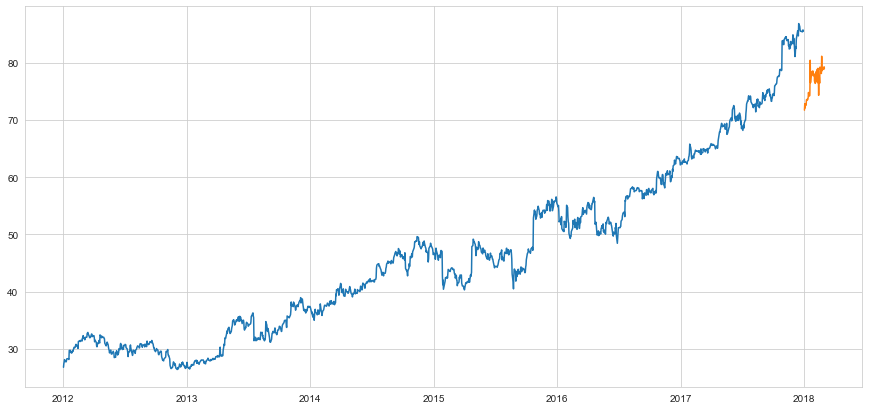

In [91]:
plt.figure(figsize = (15,7))
plt.plot(new_data['Close'])
plt.plot(forecast['Prediction'])
plt.show()

So, we predicted the unknown stock price of next two months using our model.